In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Read CSV**

In [3]:
label_df = pd.read_csv('/content/drive/My Drive/Beat-PD/Train_Dataset/Data_Train_CIS-PD/Data_Train_CIS-PD/cis-pd.data_labels/data_labels/CIS-PD_Training_Data_IDs_Labels.csv')
label_df.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor
0,cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1004,1.0,1.0,1.0
1,5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,1004,0.0,0.0,0.0
2,5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1004,1.0,1.0,1.0
3,fb188ae2-2173-4137-9236-19a137a402c2,1004,3.0,3.0,3.0
4,19a3e9ea-fce1-40b7-9457-2618970beb7b,1004,1.0,1.0,1.0


# **Dependent Variables**

In [4]:
des_df = label_df.describe()
des_df

,subject_id,on_off,dyskinesia,tremor
count,1858.000000,1767.000000,1188.000000,1462.000000
mean,1030.025834,1.028862,0.702862,0.947332
std,15.939924,1.215586,0.965326,0.907398
min,1004.000000,0.000000,0.000000,0.000000
25%,1020.000000,0.000000,0.000000,0.000000
50%,1032.000000,1.000000,0.000000,1.000000
75%,1044.000000,2.000000,1.000000,1.000000
max,1051.000000,4.000000,4.000000,4.000000


## Missing Variables

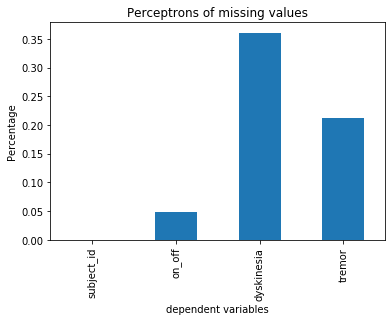

subject_id    0.000000
on_off        0.048977
dyskinesia    0.360603
tremor        0.213132
Name: count, dtype: float64


In [5]:
missing_values_df = np.ones(des_df.shape[1]) - des_df.loc['count',:]/label_df.shape[0]

missing_values_df.plot(kind='bar', figsize=(6, 4))
plt.xlabel('dependent variables')
plt.ylabel('Percentage') 
plt.title('Perceptrons of missing values') 

plt.show()
print(missing_values_df)

From the table above, I believe that we can replace missing values of 'on_off' and 'tremor' with mean values. Amount of missing values of 'dyskine' is 37%, we shouldnot replace with mean. 

### Over Dropping NA

In [6]:
label_drop_df = label_df.dropna(axis=0)
label_drop_df.describe()

,subject_id,on_off,dyskinesia,tremor
count,963.000000,963.000000,963.000000,963.000000
mean,1025.573209,1.289720,0.728972,1.053998
std,16.812640,1.315258,1.019693,1.020167
min,1004.000000,0.000000,0.000000,0.000000
25%,1007.000000,0.000000,0.000000,0.000000
50%,1023.000000,1.000000,0.000000,1.000000
75%,1038.000000,2.000000,1.000000,2.000000
max,1049.000000,4.000000,4.000000,4.000000


Let see some chart

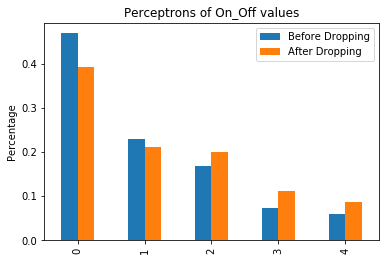

In [7]:
count, bin_edges = np.histogram(label_df[['on_off']].dropna(), 5)
count2, bin_edges2 = np.histogram(label_drop_df[['on_off']], 5)
on_off_df = pd.DataFrame(data={"Before Dropping" : count/count.sum(), "After Dropping": count2/count2.sum()})
on_off_df.plot(kind="bar")
plt.ylabel('Percentage') 
plt.title('Perceptrons of On_Off values') 

plt.show()

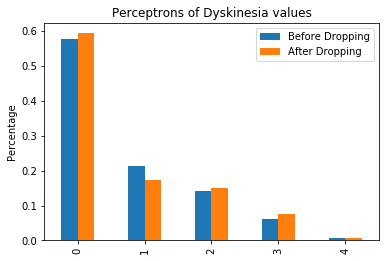

In [8]:
count, bin_edges = np.histogram(label_df[['dyskinesia']].dropna(), 5)
count2, bin_edges2 = np.histogram(label_drop_df[['dyskinesia']], 5)
dyskinesia = pd.DataFrame(data={"Before Dropping" : count/count.sum(), "After Dropping": count2/count2.sum()})
dyskinesia.plot(kind="bar")
plt.ylabel('Percentage') 
plt.title('Perceptrons of Dyskinesia values') 
plt.show()

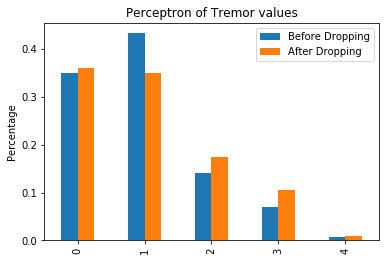

In [9]:
count, bin_edges = np.histogram(label_df['tremor'].dropna(), bins=5)
count2, bin_edges2 = np.histogram(label_drop_df['tremor'], bins=5)
tremor = pd.DataFrame(data={"Before Dropping": count/count.sum(), "After Dropping":count2/count2.sum()})
tremor.plot(kind='bar')
plt.ylabel("Percentage")
plt.title("Perceptron of Tremor values")
plt.show()

# **Independent Variables**

In [0]:
kk = 10
def get_chart_xyz(kk):
  path_csv = '/content/drive/My Drive/Beat-PD/Train_Dataset/Data_Train_CIS-PD/Data_Train_CIS-PD/cis-pd.training_data/training_data/' + label_drop_df.loc[kk, 'measurement_id'] + '.csv'
  df = pd.read_csv(path_csv)
  # df.describe()
  print(label_drop_df.loc[kk,:])

  label_names = ['X', 'Y', 'Z']
  colors = ['r', 'g', 'b']

  fig = plt.figure(figsize=(12, 20))
  for i in range(3):
    ax = fig.add_subplot(4, 1, i+1)
    ax.plot(df['Timestamp'], df[label_names[i]], marker='.', alpha = 0.5, linestyle='None', color=colors[i])
    ax.set_ylabel(label_names[i])

  ax = fig.add_subplot(4, 1, 4)
  ax.plot(df['Timestamp'], df[['X', 'Y', 'Z']], linewidth=0.5)
  ax.set_ylabel('Overall')

  plt.show()

## Let's see something 

measurement_id    dc90dc36-b4e5-43ec-b3e8-47c39c763c71
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 11, dtype: object


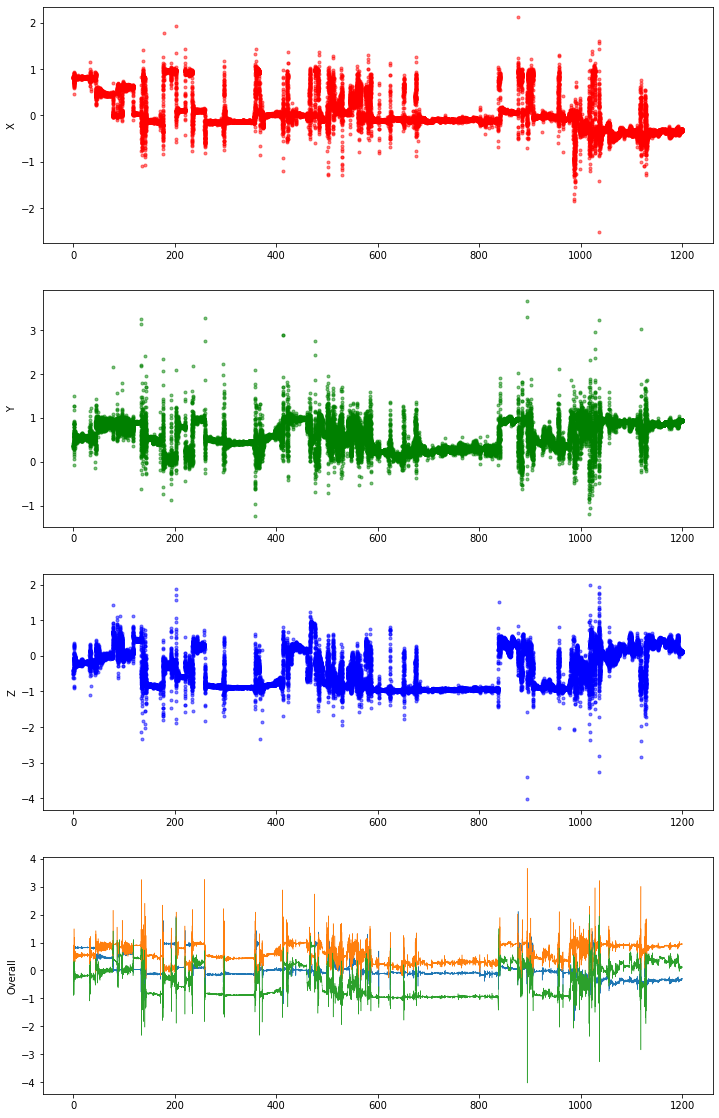

In [11]:
get_chart_xyz(11)

measurement_id    f53cfd9b-8c52-4d22-a35c-504542170ed3
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 10, dtype: object


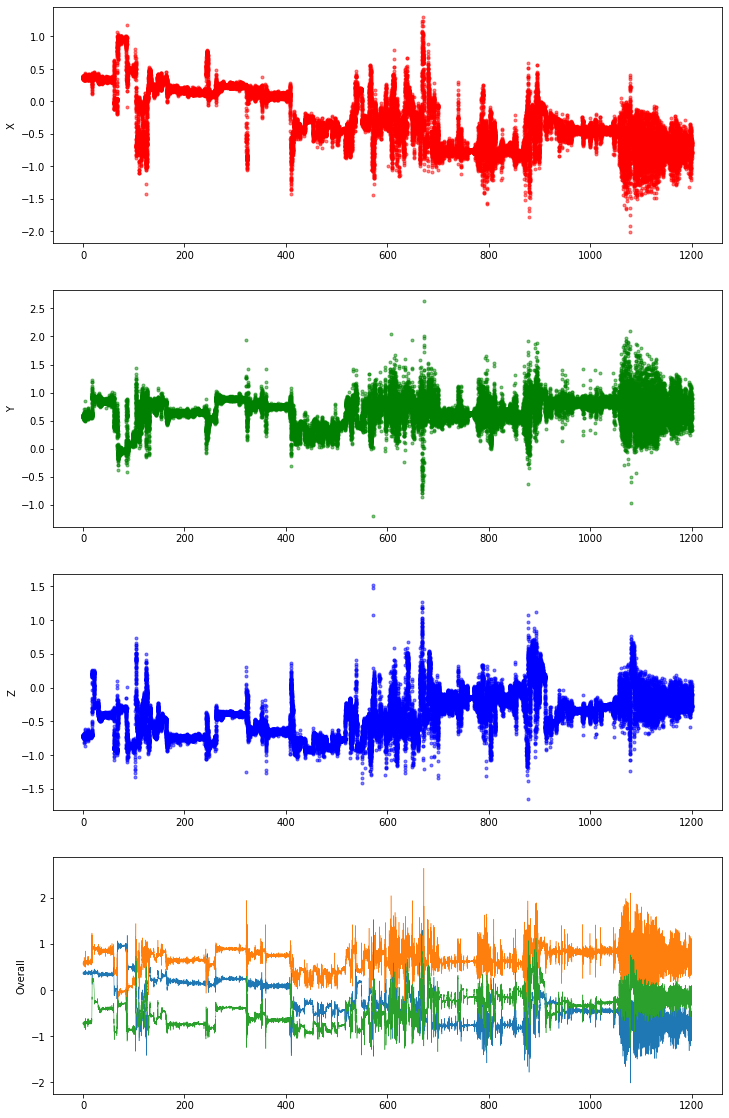

In [12]:
get_chart_xyz(10)

measurement_id    e31db4f8-f9a5-4273-a874-4bdbc6fcae2c
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 12, dtype: object


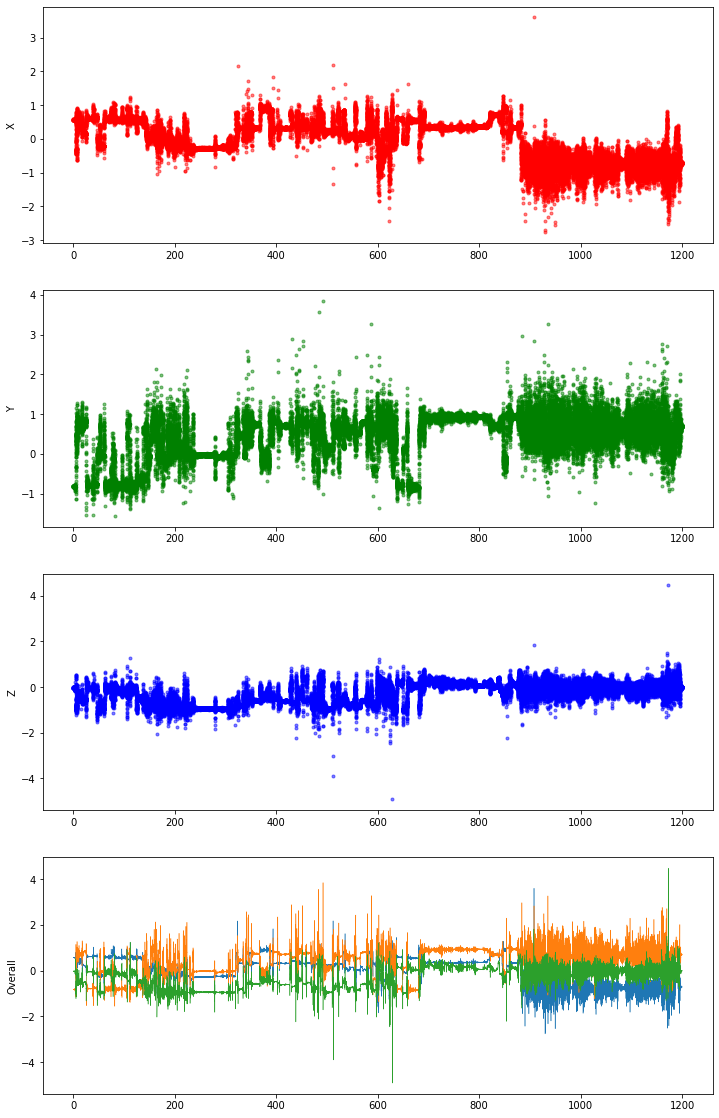

In [13]:
get_chart_xyz(12)

measurement_id    d1a9294c-05ad-4eac-9915-7052c2ad98a3
subject_id                                        1004
on_off                                               2
dyskinesia                                           2
tremor                                               2
Name: 13, dtype: object


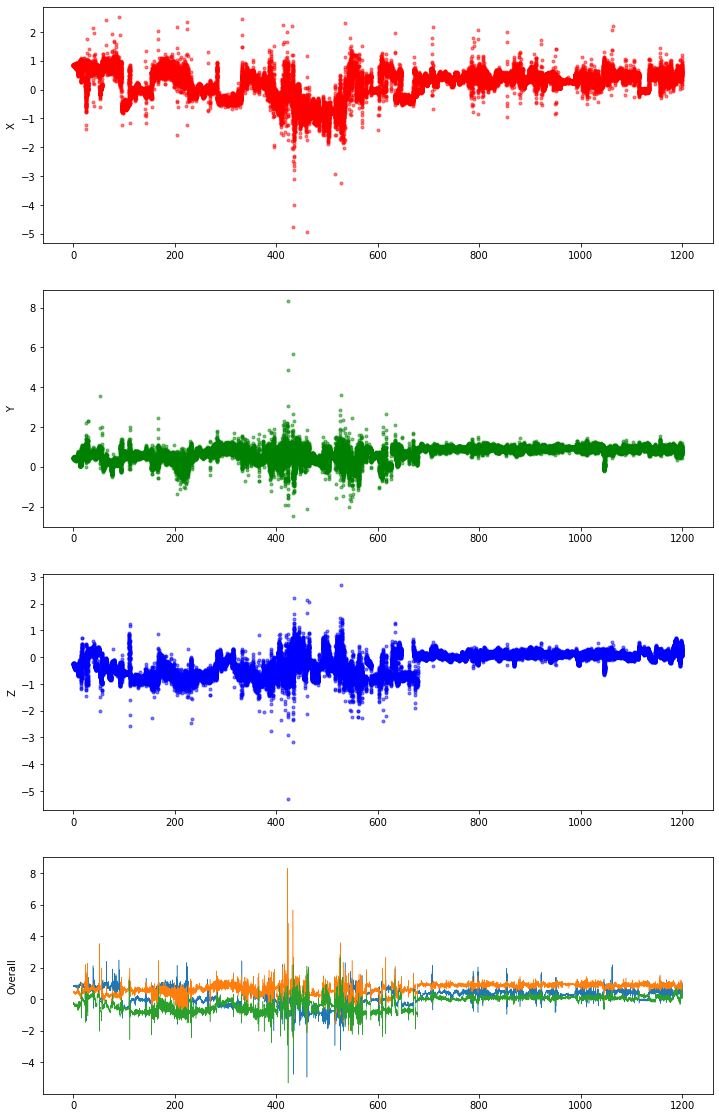

In [14]:
get_chart_xyz(13)

measurement_id    cc0d147f-94ea-4637-91d7-d4ceceaf1728
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 14, dtype: object


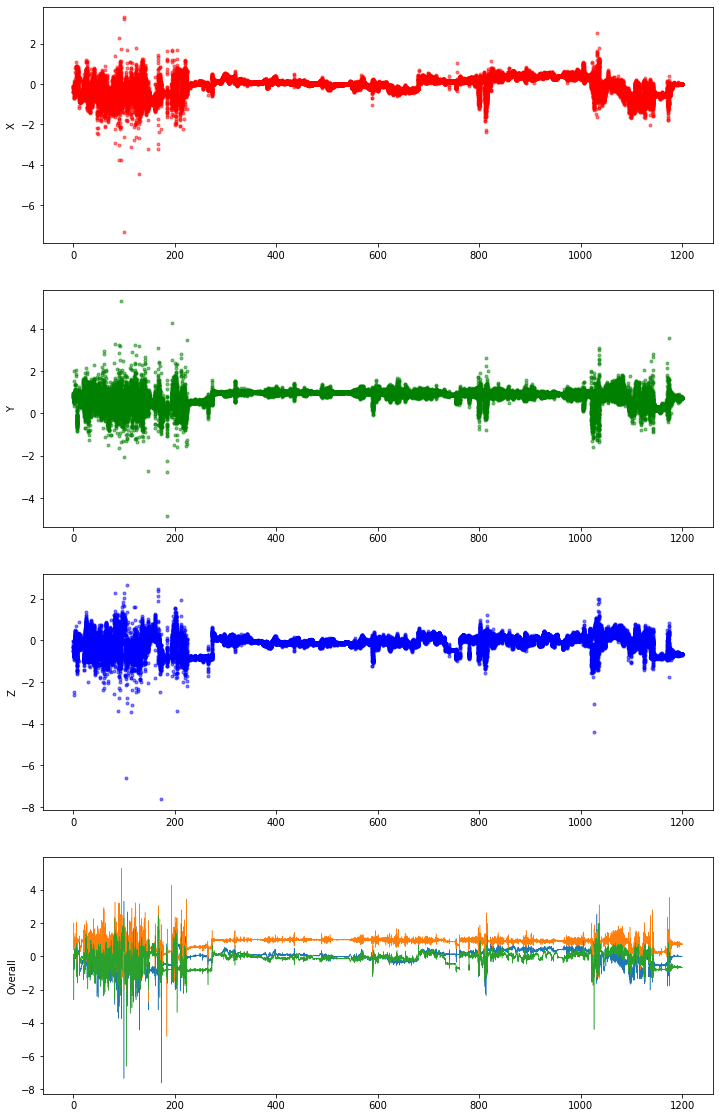

In [15]:
get_chart_xyz(14)

measurement_id    20f1dbcd-0954-4bfd-ad92-9bac1b15beb0
subject_id                                        1004
on_off                                               2
dyskinesia                                           2
tremor                                               2
Name: 15, dtype: object


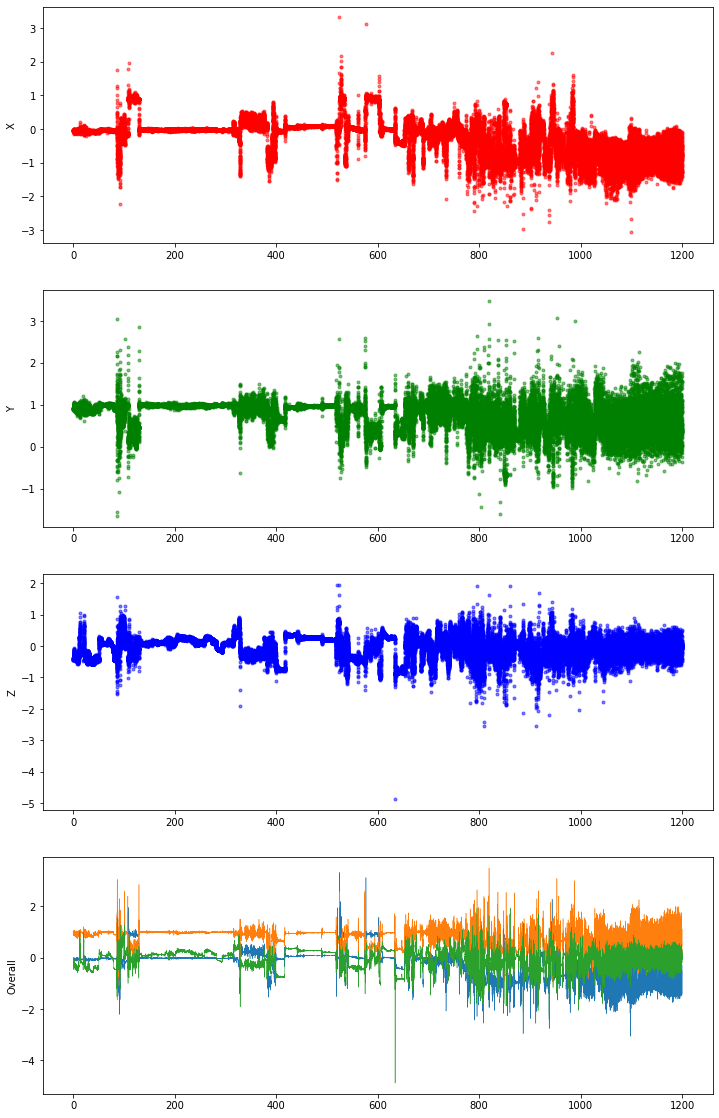

In [16]:
get_chart_xyz(15)

measurement_id    c05991ea-ed30-45ee-96a2-8a44d6ac0916
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 16, dtype: object


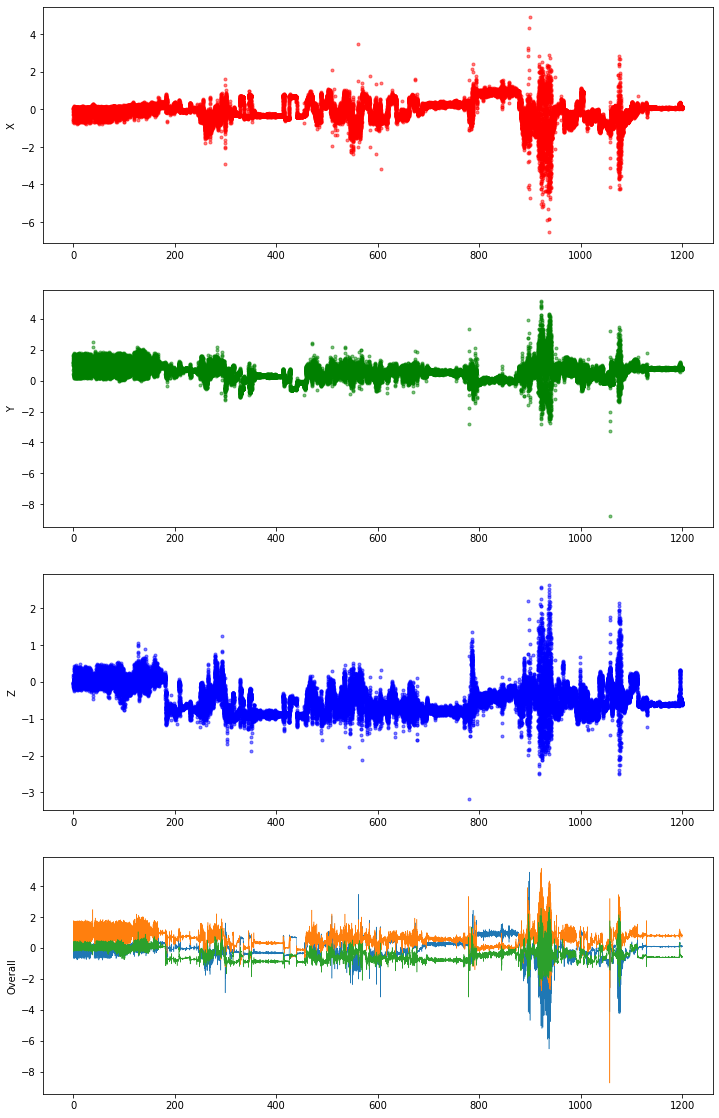

In [17]:
get_chart_xyz(16)

measurement_id    3cf49c01-0499-4bad-9167-67691711204a
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 17, dtype: object


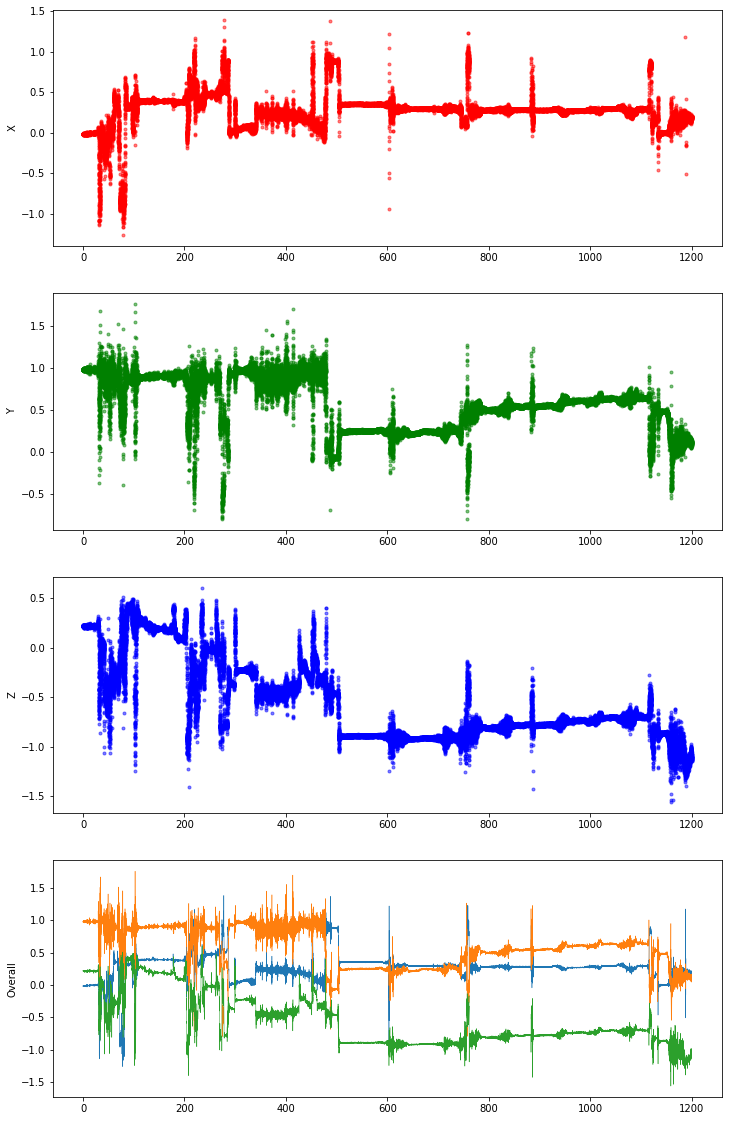

In [18]:
get_chart_xyz(17)

measurement_id    ac449a51-1819-4944-b5c3-ef42be404541
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 18, dtype: object


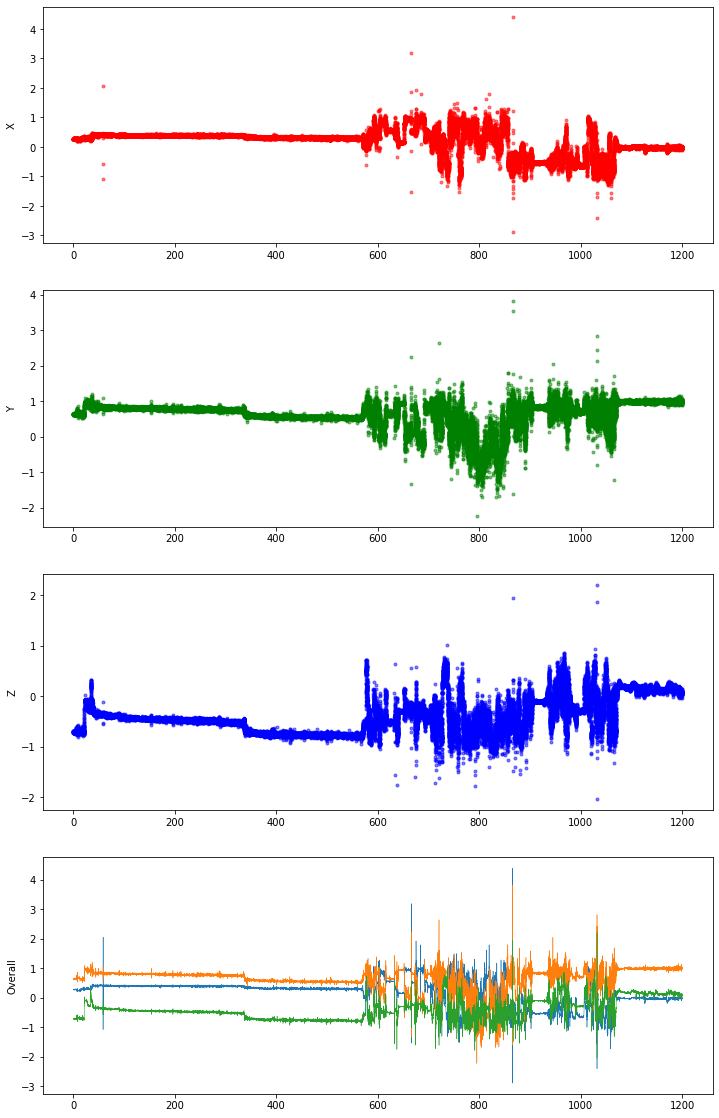

In [19]:
get_chart_xyz(18)

measurement_id    8b7abdf9-5aad-4edc-9bc4-078e29f134d6
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 19, dtype: object


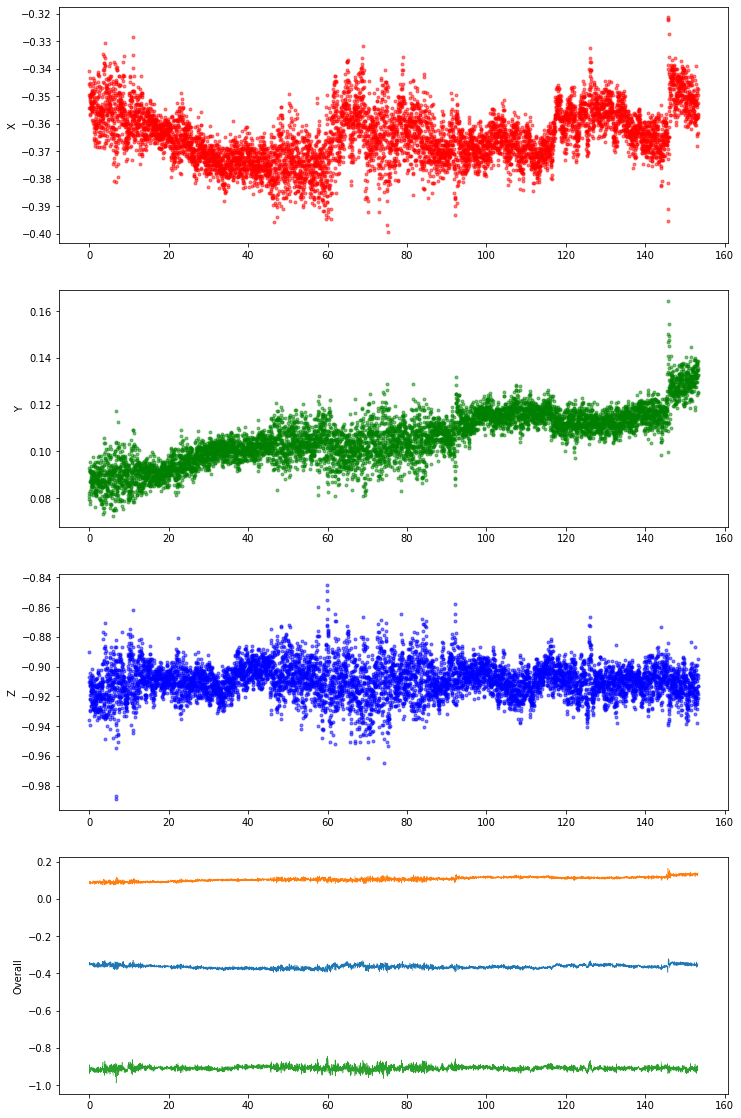

In [20]:
get_chart_xyz(19)

# Next, merge 3 a in to one

In [0]:
def get_chart_3a_xyz(kk):
  path_csv = '/content/drive/My Drive/Beat-PD/Train_Dataset/Data_Train_CIS-PD/Data_Train_CIS-PD/cis-pd.training_data/training_data/' + label_drop_df.loc[kk, 'measurement_id'] + '.csv'
  df = pd.read_csv(path_csv)
  print(label_drop_df.loc[kk,:])

  df_a = (df['X']**2 + df['Y']**2 + df['Z']**2)**(1/2)
  fig = plt.figure(figsize=(12, 5))
  ax = fig.add_subplot(1, 1, 1)
  ax.plot(df['Timestamp'], df_a, marker='.', alpha = 0.5, linestyle='None')

  plt.show()

## Let's see something

measurement_id    f53cfd9b-8c52-4d22-a35c-504542170ed3
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 10, dtype: object


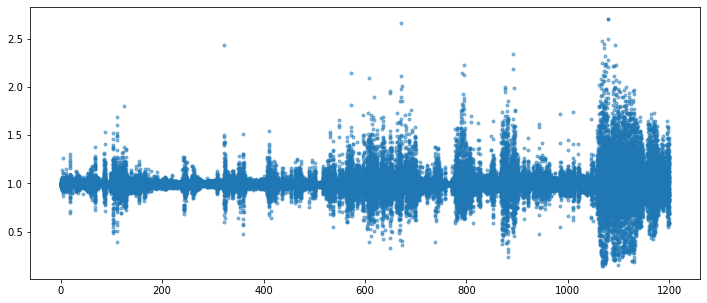

In [22]:
get_chart_3a_xyz(10)

measurement_id    dc90dc36-b4e5-43ec-b3e8-47c39c763c71
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 11, dtype: object


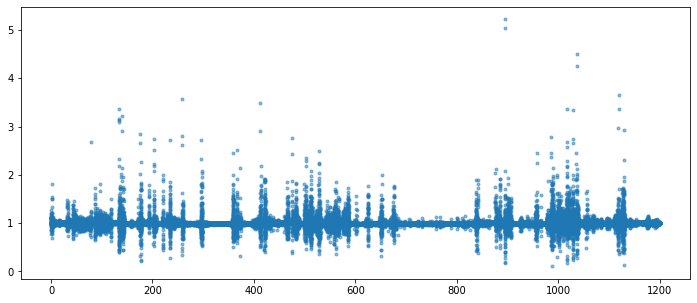

In [23]:
get_chart_3a_xyz(11)

measurement_id    e31db4f8-f9a5-4273-a874-4bdbc6fcae2c
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 12, dtype: object


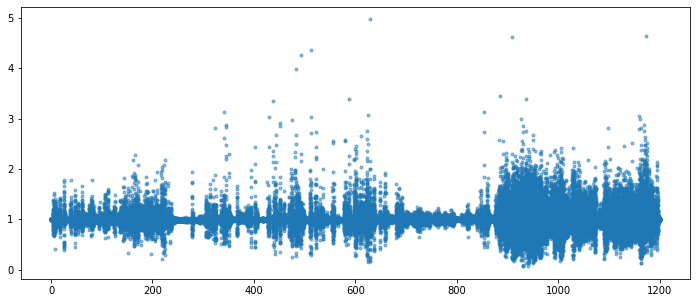

In [24]:
get_chart_3a_xyz(12)

measurement_id    d1a9294c-05ad-4eac-9915-7052c2ad98a3
subject_id                                        1004
on_off                                               2
dyskinesia                                           2
tremor                                               2
Name: 13, dtype: object


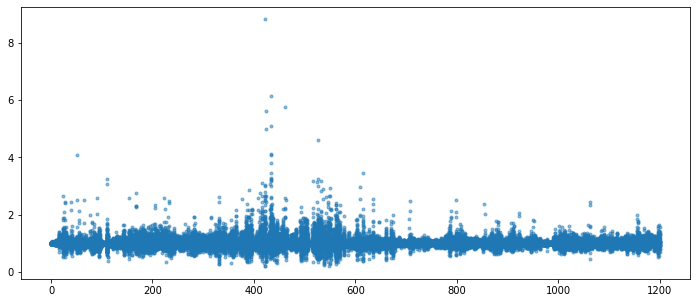

In [25]:
get_chart_3a_xyz(13)

measurement_id    cc0d147f-94ea-4637-91d7-d4ceceaf1728
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 14, dtype: object


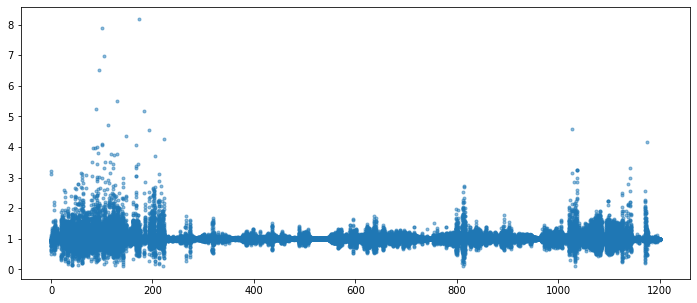

In [26]:
get_chart_3a_xyz(14)

measurement_id    20f1dbcd-0954-4bfd-ad92-9bac1b15beb0
subject_id                                        1004
on_off                                               2
dyskinesia                                           2
tremor                                               2
Name: 15, dtype: object


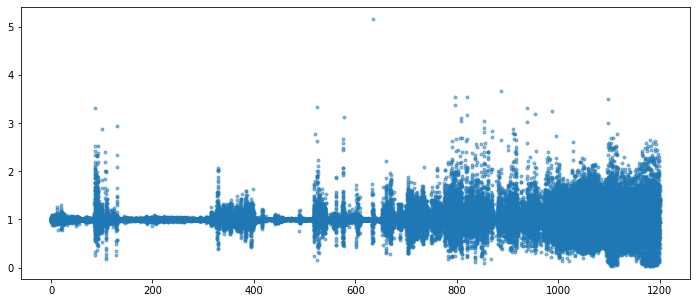

In [27]:
get_chart_3a_xyz(15)

measurement_id    cc0d147f-94ea-4637-91d7-d4ceceaf1728
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 14, dtype: object


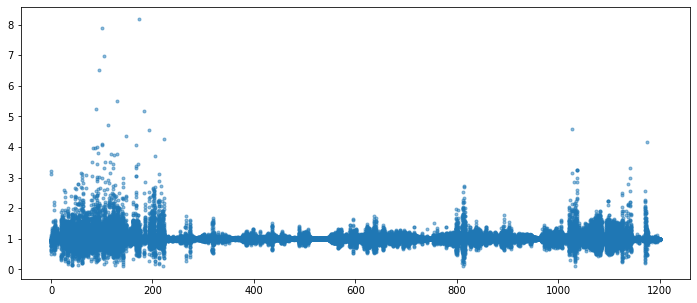

In [28]:
get_chart_3a_xyz(14)

measurement_id    20f1dbcd-0954-4bfd-ad92-9bac1b15beb0
subject_id                                        1004
on_off                                               2
dyskinesia                                           2
tremor                                               2
Name: 15, dtype: object


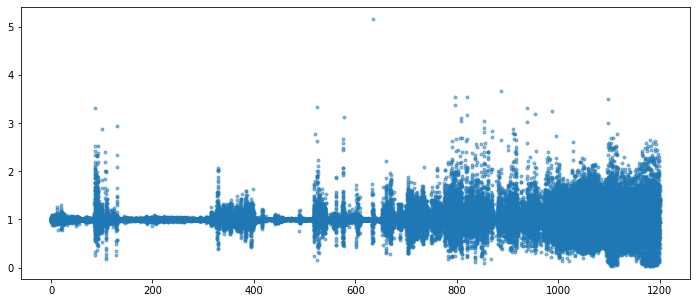

In [29]:
get_chart_3a_xyz(15)

measurement_id    c05991ea-ed30-45ee-96a2-8a44d6ac0916
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 16, dtype: object


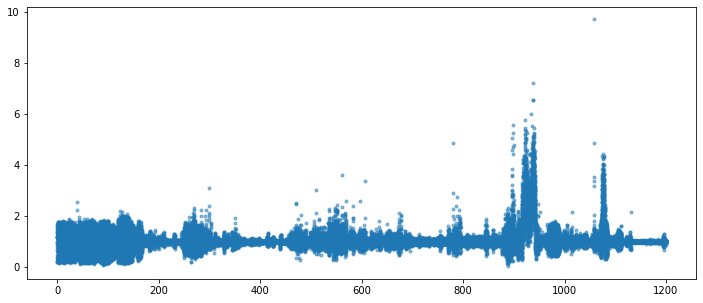

In [30]:
get_chart_3a_xyz(16)

measurement_id    3cf49c01-0499-4bad-9167-67691711204a
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 17, dtype: object


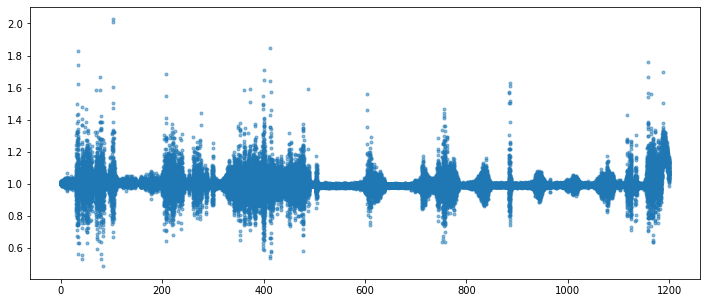

In [31]:
get_chart_3a_xyz(17)

measurement_id    ac449a51-1819-4944-b5c3-ef42be404541
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 18, dtype: object


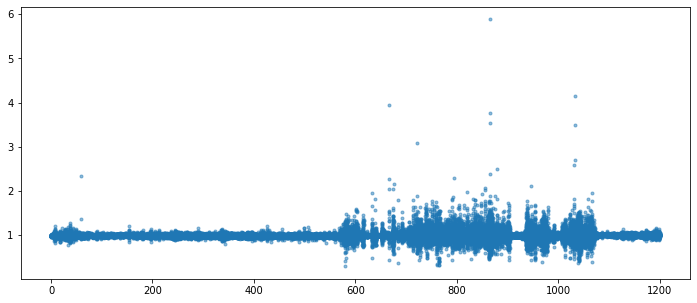

In [32]:
get_chart_3a_xyz(18)

measurement_id    8b7abdf9-5aad-4edc-9bc4-078e29f134d6
subject_id                                        1004
on_off                                               3
dyskinesia                                           3
tremor                                               3
Name: 19, dtype: object


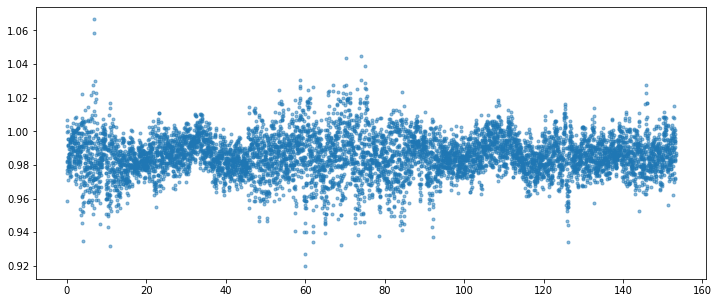

In [33]:
get_chart_3a_xyz(19)

measurement_id    6110744d-3f5c-4f2e-9586-f2722352606f
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               1
Name: 20, dtype: object


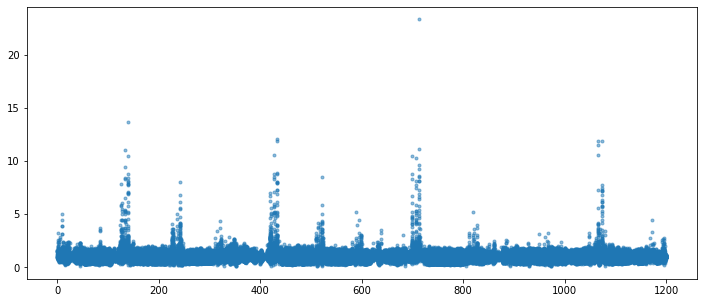

In [34]:
get_chart_3a_xyz(20)

## DBSCAN

In [0]:
epsilon = 0.8
min_samples = 5

def view_DBSCAN(X_df, y):
    print(y)
    db = DBSCAN(eps = epsilon, min_samples = min_samples).fit(X_df)
    labels = db.labels_

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(20, 5))

    # Plot the points with colors
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        # Plot the datapoints that are clustered
        xy = X_df.loc[class_member_mask & core_samples_mask]
        plt.scatter(xy['Timestamp'], xy['3D'],s=50, c=[col], marker=u'.', alpha=1)

        # Plot the outliers
        xy = X_df.loc[class_member_mask & ~core_samples_mask]
        plt.scatter(xy['Timestamp'], xy['3D'],s=50, c=[col], marker=u'.', alpha=1)
    plt.show()

# Giả thuyết:


1. Người bị PD khi rung tay có nhiều mức độ, nhưng với những người bị nhẹ (on_off = 0-1) thì biên độ gia tốc của họ hoặc rất cao, hoặc rất thấp. Còn với người bị nặng (3-4) thì hoặc là rất cao và cao. Lý do là vì họ sẽ có 2 trạng thái là hoạt động và đứng im. Việc biên độ rất cao hay các giá trị lớn chứng tỏ họ đang làm 1 việc gì đó đột ngột, các giá trị nhỏ chứng tỏ họ đang ngừng hoạt động.
> Hướng tiếp theo: Xóa đi các nhiễu trên và xem xét típ.
> Có vẻ như hướng này không đúng (3 ví dụ cuối)
2. On_off là trạng thái active của người bệnh. Tremor là độ rung của sensor. Càng off thì người càng cứng -> dễ run. Càng on thì người mềm dẻo -> khó rung.
3. Thế cái dyskinesia xử lý kiểu gì. 
4. Liệu các vị trí có gia tốc cao đột biến có phải noise không?

29/2/2020
Thử xài decision tree, các feature đưa vào lần lượt laf: 
1. Lọc bớt các nhiễu bằng DBSCAN.
2. Lấy tập hợp gia tốc cao và tấn số của nó - đánh giá độ active
3. Lấy các gia tốc từ giây 0 (giả thuyết rằng từ giây 0 đến khi gia tốc đột biến thì người đó đang ko làm gì cả) - có thể đánh giá độ rụng.
4. ấy các gia tốc từ giây cuối cùng (tương tự số 3).
5. Đưa mean + độ lệch chuẩn vào.
6. Lấy các giá trị rời rạc bằng DBSCAN nằm ngoài đường biên.
7. Lấy các hạt nằm gần 0.
8. Tìm những khoảng ổn định trong thời gian giới hạn.
9. subject id
10. Lieeu


1/3/2020
1. Độ rung nhiều khả năng là số lượng hoặc tần số các giá trị gia tốc tiến về 0.
2. Còn on_off nhiều khả năng là độ linh hoạt khi thực hiện hoạt động. Nói cách khác là bề dày của gia tốc khi nó bắt đầu lớn. (min và max của gia tốc trong 1 giây chẳng hạn).